 Extract Historical Financial Data using YFinance

In [ ]:
import yfinance as yf

# Define tickers for TSLA, BND, SPY
tickers = ['TSLA', 'BND', 'SPY']

# Define the start and end dates for data collection (January 1, 2015 to October 31, 2024)
start_date = '2015-01-01'
end_date = '2024-10-31'

# Download data for all tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Show the first few rows of the data
print("Initial Data Sample:")
print(data.head())


In [ ]:
# Save the fetched data to a CSV file
file_path = "../data/financial_data.csv"
data.to_csv(file_path)
print(f"Data has been saved to {file_path}")


In [7]:
import pandas as pd

# Path to the saved financial data CSV file
file_path = "../data/financial_data.csv"

# Load the saved data into the DataFrame 'df'
df = pd.read_csv(file_path, header=[0, 1], index_col=0, parse_dates=True)

# Show the first few rows of the loaded data
print("Loaded Data Sample:")
df.head(4)


Loaded Data Sample:


Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358788  173.173798  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542763  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726753  168.444656  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765049  170.543655  14.063333  83.180000   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007  14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998  14.063333  83.279999  202.720001   

Price                                       Low                         \
Ticker                          TSLA        BND         SPY       TSLA   
Date                                                                     
2015-01-02 00:00:00+00:00  14.883333  82.419998  204.179993  14.217333   
2015-01-05 00:00:00+00:00  14.433333  82.699997  201.350006  13.810667   
2015-01-06 00:00:00+00:00  14.280000  83.029999  198.860001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  83.050003  200.880005  13.985333   

Price                           Open                          Volume  \
Ticker                           BND         SPY       TSLA      BND   
Date                                                                   
2015-01-02 00:00:00+00:00  82.430000  206.380005  14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998  14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996  14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998  14.223333  2433400   

Price                                           
Ticker                           SPY      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  121465900  71466000  
2015-01-05 00:00:00+00:00  169632600  80527500  
2015-01-06 00:00:00+00:00  209151400  93928500  
2015-01-07 00:00:00+00:00  125346700  44526000


 Data Cleaning and Understanding

In [ ]:


# 1. Check for missing values in all columns
missing_values = df.isnull().sum()
print("\nMissing Values in All Columns:")
print(missing_values)

# 2. Check the data types of all columns
data_types = df.dtypes
print("\nData Types of All Columns:")
print(data_types)

# 3. Fill missing values using forward fill for all columns (can also use interpolation or removal)
df.dropna()

# Verify missing values after cleaning
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing Values After Cleaning (Forward Fill):")
print(missing_values_after_cleaning)

# 4. Basic descriptive statistics for all columns (helps understand the distribution of data)
description = df.describe()
print("\nBasic Statistics of All Columns:")
print(description)

# 5. Normalize the data (Min-Max Scaling) for all numeric columns (e.g., Open, High, Low, Close, Volume)
df = (df - df.min()) / (df.max() - df.min())

# Show normalized data sample (after Min-Max Scaling)
print("\nNormalized Data (Min-Max Scaling) Sample:")
print(df.head())



Missing Values in All Columns:
Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64

Data Types of All Columns:
Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND       float64
           SP

In [29]:
# 1. Check for missing values in all columns
missing_values_per_column = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values_per_column)

# 2. Check the data types of all columns
column_data_types = df.dtypes
print("\nData Types of Each Column:")
print(column_data_types)

# 3. Fill missing values using forward fill for all columns (alternative: interpolation or removal)
df_filled = df.ffill()

# Verify missing values after cleaning
missing_values_after_fill = df_filled.isnull().sum()
print("\nMissing Values After Forward Fill:")
print(missing_values_after_fill)

# 4. Basic descriptive statistics for all columns (helps understand the distribution of data)
descriptive_statistics = df_filled.describe()
print("\nBasic Descriptive Statistics for Each Column:")
print(descriptive_statistics)

# 5. Normalize the data (Min-Max Scaling) for all numeric columns (e.g., Open, High, Low, Close, Volume)
normalized_df = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min())

# Show normalized data sample (after Min-Max Scaling)
print("\nNormalized Data Sample (Min-Max Scaling):")
print(normalized_df.head())



Missing Values in Each Column:
Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64

Data Types of Each Column:
Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND       float64
           SP

In [ ]:
# Save cleaned DataFrame to a CSV file
normalized_df.to_csv('../data/cleaned_data.csv', index=False)
print("\nCleaned data saved as 'cleaned_data.csv'.")



Cleaned data saved as 'cleaned_data.csv'.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

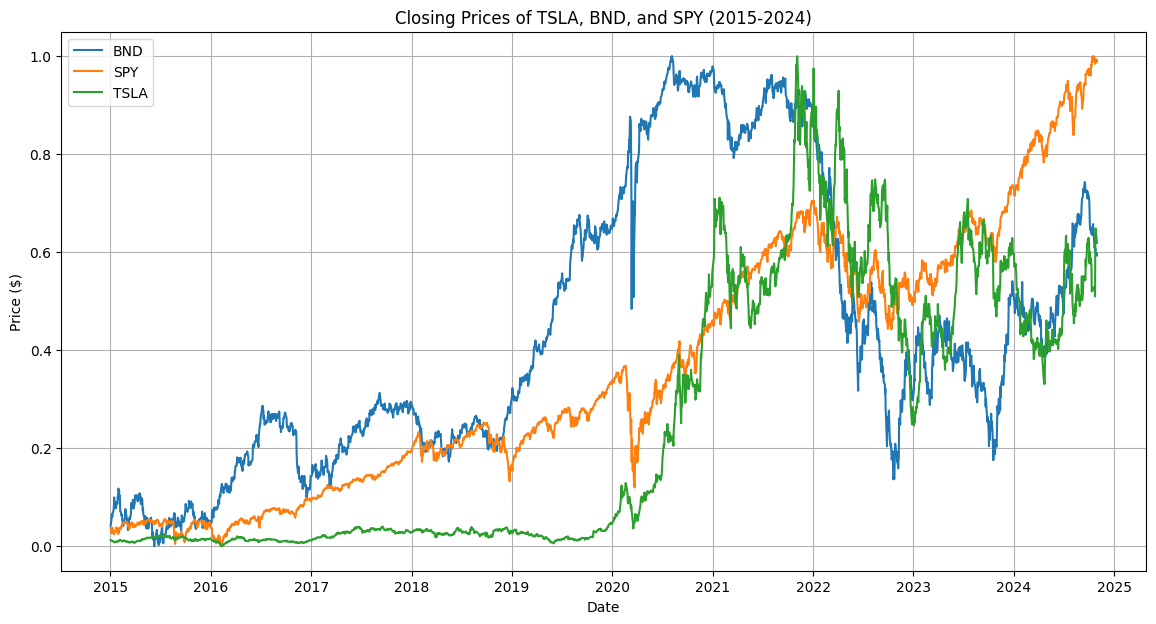

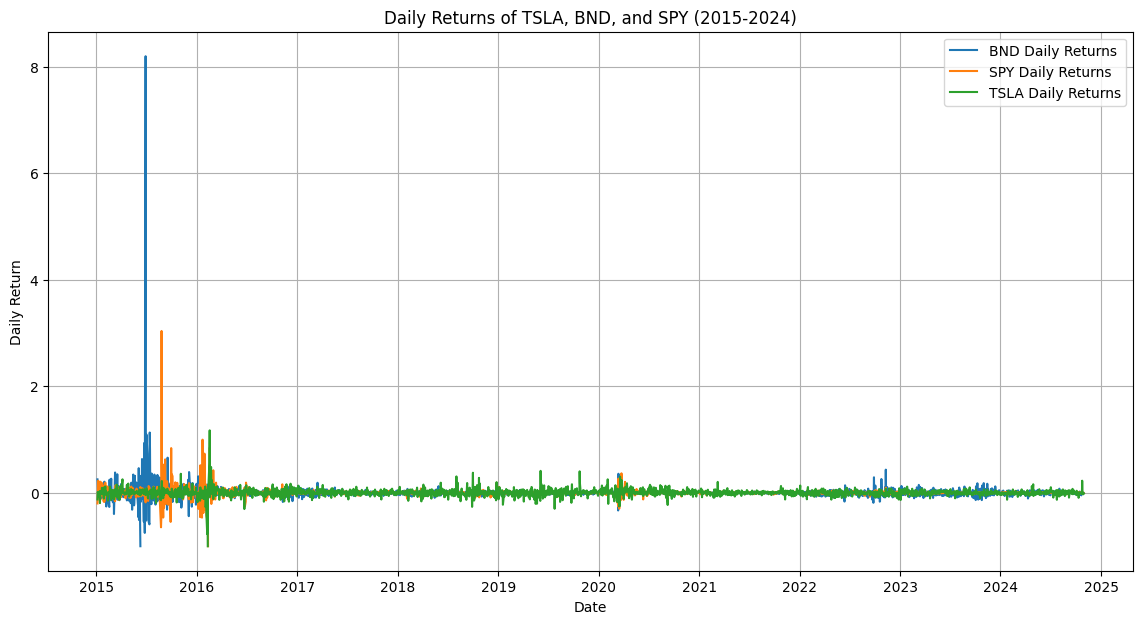

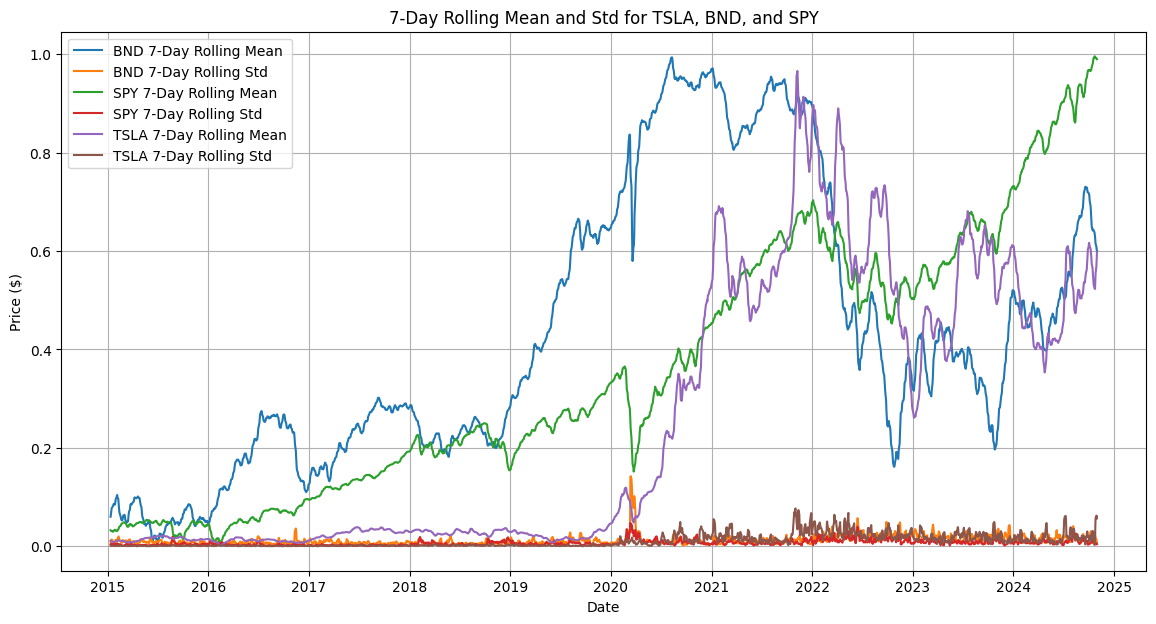

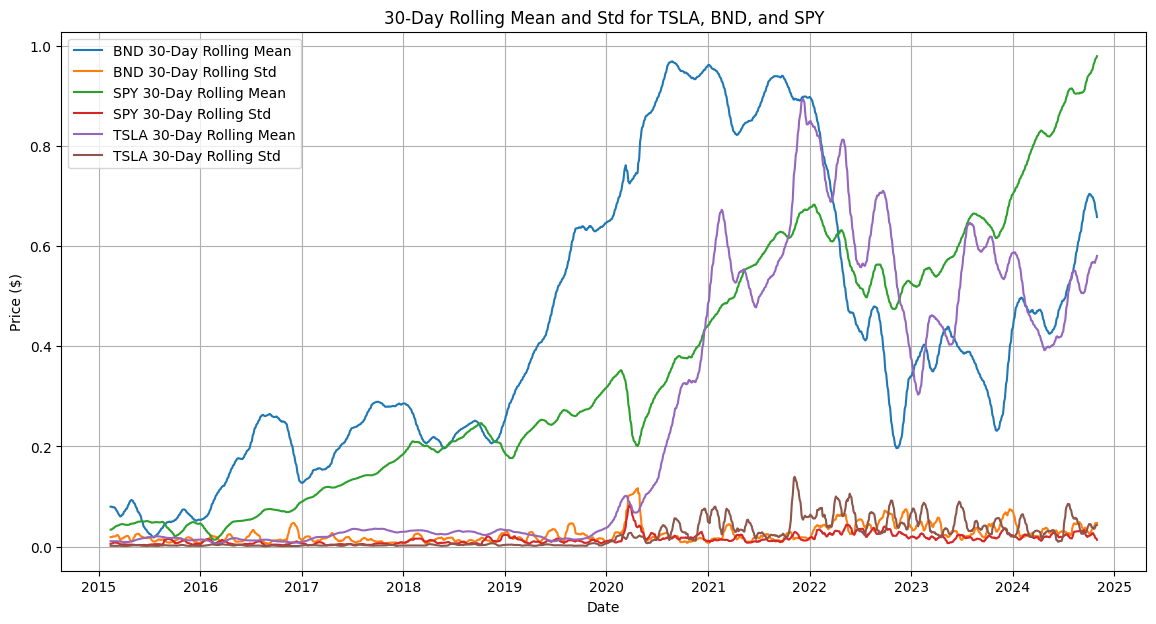

c:\Kifiya_week11\myvenv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


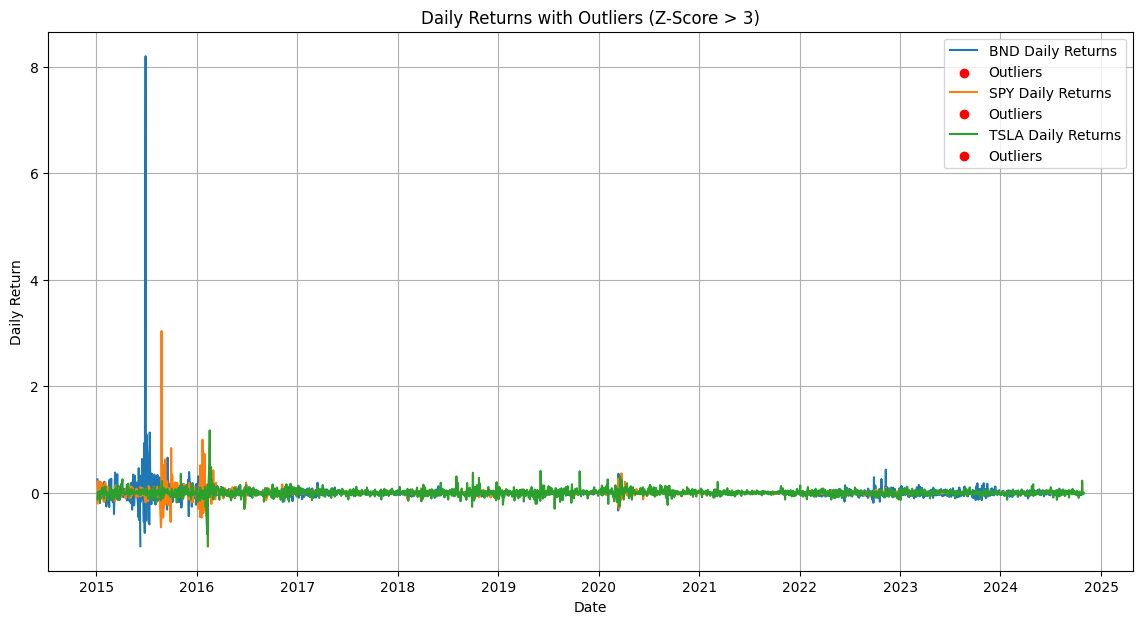

c:\Kifiya_week11\myvenv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Kifiya_week11\myvenv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


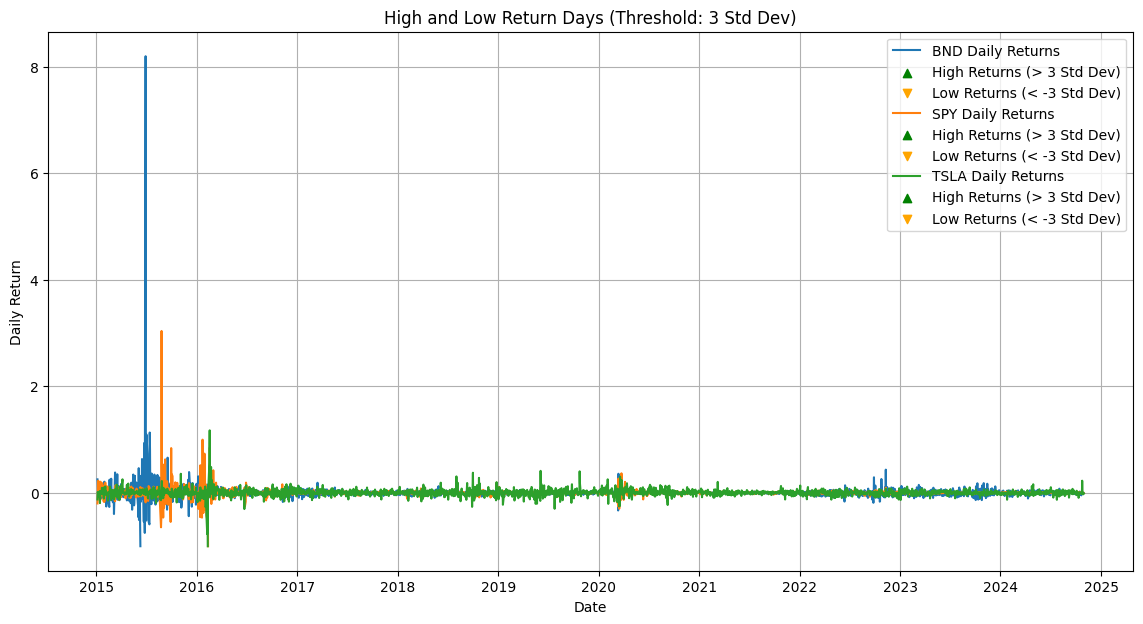

In [22]:
import matplotlib.pyplot as plt

# 1. Visualize the closing price over time for each ticker
adj_close = df['Adj Close']

plt.figure(figsize=(14, 7))
for ticker in adj_close.columns:
    plt.plot(adj_close[ticker], label=ticker)
plt.title('Closing Prices of TSLA, BND, and SPY (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Calculate and plot the daily percentage change (returns)
returns = adj_close.pct_change().dropna()

plt.figure(figsize=(14, 7))
for ticker in returns.columns:
    plt.plot(returns[ticker], label=f'{ticker} Daily Returns')
plt.title('Daily Returns of TSLA, BND, and SPY (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# 3. Analyze volatility by calculating rolling means and standard deviations (7-day and 30-day rolling window)
rolling_mean_7 = adj_close.rolling(window=7).mean()
rolling_std_7 = adj_close.rolling(window=7).std()

rolling_mean_30 = adj_close.rolling(window=30).mean()
rolling_std_30 = adj_close.rolling(window=30).std()

# Plot rolling means and standard deviations
plt.figure(figsize=(14, 7))
for ticker in adj_close.columns:
    plt.plot(rolling_mean_7[ticker], label=f'{ticker} 7-Day Rolling Mean')
    plt.plot(rolling_std_7[ticker], label=f'{ticker} 7-Day Rolling Std')
plt.title('7-Day Rolling Mean and Std for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 30-day rolling means and standard deviations
plt.figure(figsize=(14, 7))
for ticker in adj_close.columns:
    plt.plot(rolling_mean_30[ticker], label=f'{ticker} 30-Day Rolling Mean')
    plt.plot(rolling_std_30[ticker], label=f'{ticker} 30-Day Rolling Std')
plt.title('30-Day Rolling Mean and Std for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Perform outlier detection based on the Z-score (for returns)
z_scores = (returns - returns.mean()) / returns.std()

# Z-score greater than 3 indicates outliers
outliers = z_scores.abs() > 3
outlier_dates = outliers[outliers].dropna(how='all')

# Plot the outliers on the daily returns graph
plt.figure(figsize=(14, 7))
for ticker in returns.columns:
    plt.plot(returns[ticker], label=f'{ticker} Daily Returns')

    # Remove NaN values from the outlier_dates for each ticker
    valid_outliers = outlier_dates[ticker].dropna()

    # Plot outliers for each ticker
    plt.scatter(valid_outliers.index, returns[ticker].loc[valid_outliers.index], color='red', label='Outliers')

plt.title('Daily Returns with Outliers (Z-Score > 3)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# 5. Analyze days with unusually high or low returns (e.g., > 3 standard deviations)
high_return_days = returns[returns > 3 * returns.std()]
low_return_days = returns[returns < -3 * returns.std()]

# Plot the high and low return days
plt.figure(figsize=(14, 7))
for ticker in returns.columns:
    plt.plot(returns[ticker], label=f'{ticker} Daily Returns')
    plt.scatter(high_return_days.index, high_return_days[ticker], color='green', label='High Returns (> 3 Std Dev)', marker='^')
    plt.scatter(low_return_days.index, low_return_days[ticker], color='orange', label='Low Returns (< -3 Std Dev)', marker='v')

plt.title('High and Low Return Days (Threshold: 3 Std Dev)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
df.head(4)

Price                     Adj Close                         Close            \
Ticker                          BND       SPY      TSLA       BND       SPY   
Date                                                                          
2015-01-02 00:00:00+00:00  0.041991  0.037086  0.012594  0.681437  0.056182   
2015-01-05 00:00:00+00:00  0.052703  0.029766  0.011059  0.692630  0.046947   
2015-01-06 00:00:00+00:00  0.063416  0.026017  0.011257  0.703824  0.042217   
2015-01-07 00:00:00+00:00  0.065645  0.030930  0.011202  0.706157  0.048416   

Price                                    High                           Low  \
Ticker                         TSLA       BND       SPY      TSLA       BND   
Date                                                                          
2015-01-02 00:00:00+00:00  0.012594  0.674682  0.056664  0.011263  0.672727   
2015-01-05 00:00:00+00:00  0.011059  0.685526  0.050420  0.010149  0.685781   
2015-01-06 00:00:00+00:00  0.011257  0.707214  0.046316  0.009770  0.701165   
2015-01-07 00:00:00+00:00  0.011202  0.702499  0.046316  0.009866  0.702098   

Price                                              Open                      \
Ticker                          SPY      TSLA       BND       SPY      TSLA   
Date                                                                          
2015-01-02 00:00:00+00:00  0.057675  0.012148  0.668374  0.059568  0.013359   
2015-01-05 00:00:00+00:00  0.050628  0.011122  0.682813  0.054092  0.011979   
2015-01-06 00:00:00+00:00  0.044427  0.010626  0.696320  0.048938  0.011234   
2015-01-07 00:00:00+00:00  0.049457  0.011563  0.701444  0.047278  0.011780   

Price                        Volume                      
Ticker                          BND       SPY      TSLA  
Date                                                     
2015-01-02 00:00:00+00:00  0.069474  0.207805  0.067348  
2015-01-05 00:00:00+00:00  0.182236  0.306716  0.077377  
2015-01-06 00:00:00+00:00  0.121726  0.387867  0.092210  
2015-01-07 00:00:00+00:00  0.076193  0.215775  0.037529

In [28]:
print(df.columns)

MultiIndex([('Adj Close',  'BND'),
            ('Adj Close',  'SPY'),
            ('Adj Close', 'TSLA'),
            (    'Close',  'BND'),
            (    'Close',  'SPY'),
            (    'Close', 'TSLA'),
            (     'High',  'BND'),
            (     'High',  'SPY'),
            (     'High', 'TSLA'),
            (      'Low',  'BND'),
            (      'Low',  'SPY'),
            (      'Low', 'TSLA'),
            (     'Open',  'BND'),
            (     'Open',  'SPY'),
            (     'Open', 'TSLA'),
            (   'Volume',  'BND'),
            (   'Volume',  'SPY'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


Decompose the Time Series into Trend, Seasonal, and Residual Components

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' contains the 'Adj Close' data for TSLA
adj_close = df['Adj Close']['TSLA']

# 1. Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(adj_close, model='multiplicative', period=252)  # 252 trading days per year

# Plot decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(adj_close, label='Original Series')
plt.title('Original Tesla Stock Price (Adj Close)')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [24]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' is a DataFrame containing the 'Adj Close' data for multiple stocks like TSLA, BND, SPY
assets = ['TSLA', 'BND', 'SPY']

# Iterate through each asset to perform decomposition and plot separately
for asset in assets:
    adj_close = df['Adj Close'][asset]
    
    # Decompose the time series into trend, seasonal, and residual components
    decomposition = sm.tsa.seasonal_decompose(adj_close, model='multiplicative', period=252)  # 252 trading days per year
    
    # Create a new figure for each asset's decomposition
    plt.figure(figsize=(12, 10))
    
    # Plot the original series
    plt.subplot(4, 1, 1)
    plt.plot(adj_close, label=f'Original {asset}')
    plt.title(f'Original {asset} Price (Adj Close)')
    plt.legend()
    
    # Plot the trend component
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label=f'{asset} Trend')
    plt.title(f'{asset} Trend Component')
    plt.legend()
    
    # Plot the seasonal component
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label=f'{asset} Seasonal')
    plt.title(f'{asset} Seasonal Component')
    plt.legend()
    
    # Plot the residual component
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label=f'{asset} Residual')
    plt.title(f'{asset} Residual Component')
    plt.legend()
    
    # Tight layout for individual plots
    plt.tight_layout()
    plt.show()


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is a DataFrame containing the 'Adj Close' data for multiple stocks like TSLA, BND, SPY
assets = ['TSLA', 'BND', 'SPY']

# Iterate through each asset to calculate rolling means and standard deviations
for asset in assets:
    adj_close = df['Adj Close'][asset]
    
    # 2. Calculate rolling means and standard deviations (7-day and 30-day windows)
    rolling_mean_7 = adj_close.rolling(window=7).mean()
    rolling_std_7 = adj_close.rolling(window=7).std()

    rolling_mean_30 = adj_close.rolling(window=30).mean()
    rolling_std_30 = adj_close.rolling(window=30).std()
    
    # Plot rolling means and standard deviations for 7-day window
    plt.figure(figsize=(14, 7))
    plt.plot(rolling_mean_7, label='7-Day Rolling Mean', color='blue')
    plt.plot(rolling_std_7, label='7-Day Rolling Std Dev', color='orange')
    plt.title(f'7-Day Rolling Mean and Std Dev for {asset} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot rolling means and standard deviations for 30-day window
    plt.figure(figsize=(14, 7))
    plt.plot(rolling_mean_30, label='30-Day Rolling Mean', color='green')
    plt.plot(rolling_std_30, label='30-Day Rolling Std Dev', color='red')
    plt.title(f'30-Day Rolling Mean and Std Dev for {asset} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


Calculate Financial Metrics: Value at Risk (VaR) and Sharpe Ratio

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is a DataFrame containing the 'Adj Close' data for multiple stocks like TSLA, BND, SPY
assets = ['TSLA', 'BND', 'SPY']

# Iterate through each asset to calculate VaR and Sharpe ratio
for asset in assets:
    adj_close = df['Adj Close'][asset]
    
    # 3. Calculate daily returns
    returns = adj_close.pct_change().dropna()

    # Value at Risk (VaR) - 1-day VaR at 95% confidence level
    VaR_95 = returns.quantile(0.05)

    # Sharpe Ratio (Assuming risk-free rate is 0)
    sharpe_ratio = returns.mean() / returns.std()

    # Annualize the Sharpe Ratio (assuming 252 trading days per year)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)

    # Display key metrics for each asset
    print(f"\n{asset} Metrics:")
    print(f"1-day VaR (95% confidence level): {VaR_95:.4f}")
    print(f"Sharpe Ratio (Daily): {sharpe_ratio:.4f}")
    print(f"Annualized Sharpe Ratio: {annualized_sharpe_ratio:.4f}")


Volatility Analysis: Plotting Rolling Volatility

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is a DataFrame containing the 'Adj Close' data for multiple stocks like TSLA, BND, SPY
assets = ['TSLA', 'BND', 'SPY']

# Iterate through each asset to calculate and plot rolling volatility
for asset in assets:
    adj_close = df['Adj Close'][asset]
    
    # Calculate 7-day and 30-day rolling standard deviations (volatility)
    rolling_std_7 = adj_close.rolling(window=7).std()
    rolling_std_30 = adj_close.rolling(window=30).std()
    
    # Plot rolling volatility (7-day and 30-day rolling standard deviation)
    plt.figure(figsize=(14, 7))
    plt.plot(rolling_std_7, label='7-Day Rolling Std Dev', color='blue')
    plt.plot(rolling_std_30, label='30-Day Rolling Std Dev', color='red')
    plt.title(f'Volatility Analysis for {asset} Stock')
    plt.xlabel('Date')
    plt.ylabel('Volatility (Std Dev)')
    plt.legend()
    plt.grid(True)
    plt.show()
